<a href="https://colab.research.google.com/github/glebishead/CelsiusToFahrenheit/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

F = 1.8 * C + 32

y = kx + b

In [2]:
c = np.array([-273, -100, -40, 0, 10, 14, 38, 50, 100, 400, 800])
f = np.array(c * 1.8 + 32)

Обучающая выборка, пара значение - ответ 

f[i] = 1.8 * c[i] + 32

c - список градусов Цельсия

f - Фаренгейта

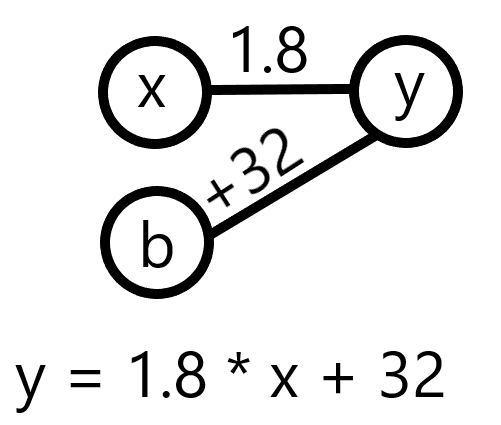

In [3]:
model = Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.1))

Sequential - последовательный. Модель полносвязная, сигнал распространяется последовательно в одном направлении.

Создание модели, её компиляция

In [4]:
history = model.fit(c, f, epochs=100, verbose=False)

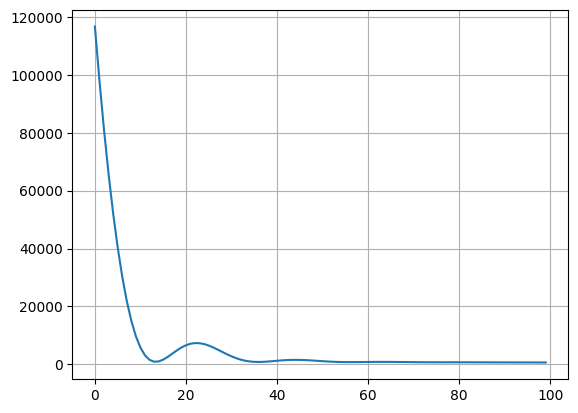

In [5]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [9]:
print(model.predict([100]))
print(100 * 1.8 + 32)
print(model.get_weights())

1/1 [==============================] - 0s 166ms/step
[[211.99869]]
212.0
[array([[1.8]], dtype=float32), array([31.998682], dtype=float32)]


Существует разница, пробуем дообучить

In [7]:
new_c = np.array([np.random.randint(-273, 1000) for _ in range(100)])
new_f = new_c * 1.8 + 32

new_history = model.fit(new_c, new_f, epochs=500, verbose=False)

Дообучили модель


[array([[1.8]], dtype=float32), array([31.998682], dtype=float32)]


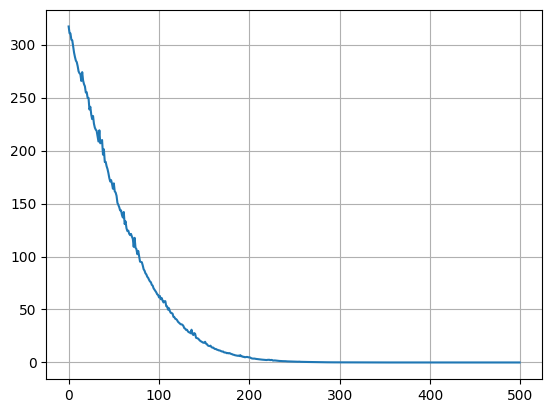

In [8]:
print(model.get_weights())
plt.plot(new_history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
for i in range(-100, 100):
  print(model.predict([i]))
  print(i * 1.8 + 32)

Тест

In [ ]:
for i in range(-1000, -100):
  result = model.predict([i])
  if abs(i * 1.8 + 32 - result) >= 0.001:
    print(i * 1.8 + 32, result)

In [ ]:
print(model.get_weights())

[array([[1.8000028]], dtype=float32), array([31.99831], dtype=float32)]


Практически совпадают. Хорошая точность для нейронной сети

In [ ]:
model.save('model')